In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('obesity.csv')

In [3]:
print(df.shape)
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicated values:", df.duplicated().sum())

(2111, 17)
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Number of duplicated values: 0


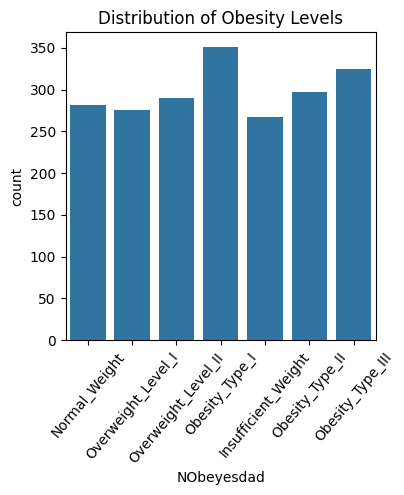

In [4]:
plt.figure(figsize=(4, 4))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=50)
plt.show()

In [5]:

label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

In [6]:
categorical_features = ['Gender', 'family_history_with_overweight',
                        'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_features = ['Age', 'Height', 'Weight',
                      'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [7]:
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numerical_features)
    ])

In [10]:
knn_model = KNeighborsClassifier()
pipeline = Pipeline(
    steps=[('preprocessor', preprocessor), ('classifier', knn_model)])

In [11]:
param_grid = {'classifier__n_neighbors': [3, 5, 7, 9, 11],
              'classifier__weights': ['uniform', 'distance'],
              'classifier__p': [1, 2]}

In [12]:
best_model = pipeline.fit(X_train, y_train)

In [13]:
accuracy = best_model.score(X_test, y_test)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8397129186602871


In [14]:
best_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])])),
                ('classifier', KNeighborsClassifier())])

In [15]:
test_data = pd.read_csv('test.csv')
test_predictions = best_model.predict(test_data)

In [16]:
submission_df = pd.DataFrame(
    {'id': test_data['id'], 'NObeyesdad': label_encoder.inverse_transform(test_predictions)})
submission_df.to_csv('submission.csv', index=False)